In [2]:
from storm_analysis.daostorm_3d.mufit_analysis import analyze
import storm_analysis.sa_library.readinsight3 as readinsight3
import sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sample_i3 = './sample_plate-Copy1.bin'

In [4]:
i3_reader = readinsight3.I3Reader(sample_i3)
frames = i3_reader.getNumberFrames()

w_x_mean_list = []
w_y_mean_list = []
for i in range(1, frames+1):
    data = i3_reader.getMoleculesInFrameRange(start = i, stop = i+1)
    molecules = len(data)
    
    xc = np.zeros(molecules)
    yc = np.zeros(molecules)
    zc = np.zeros(molecules)
    w = np.zeros(molecules)
    ratio = np.zeros(molecules)
    
    for j in range(molecules):
        w[j] = data[j][6]
        ratio[j] = data[j][8]
        
    w_x = np.sqrt(w*w/ratio)
    w_y = np.sqrt(w*w*ratio)
    
    # Outlier removal
    w_x_mean = np.mean(w_x, axis=0)
    w_x_sd = np.std(w_x, axis=0)

    w_x_final_list = [x for x in w_x if (x > w_x_mean - 2 * w_x_sd)]
    w_x_final_list = [x for x in w_x_final_list if (x < w_x_mean + 2 * w_x_sd)]
    
    w_y_mean = np.mean(w_y, axis=0)
    w_y_sd = np.std(w_y, axis=0)

    w_y_final_list = [y for y in w_y if (y > w_y_mean - 2 * w_y_sd)]
    w_y_final_list = [y for y in w_y_final_list if (y < w_y_mean + 2 * w_y_sd)]
    
    w_x_mean_updated = np.mean(w_x_final_list)
    w_y_mean_updated = np.mean(w_y_final_list)
    
    w_x_mean_list.append(w_x_mean_updated)
    w_y_mean_list.append(w_y_mean_updated)

('Version:', 'M425')
('Frames:', 1)
('Status:', 6)
('Molecules:', 11284)



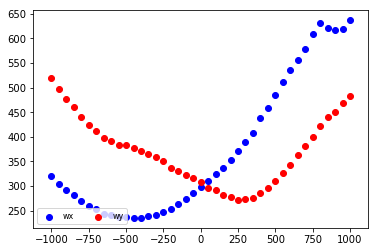

In [5]:
colors = ['b', 'r']

z = np.linspace(-1000, +1000, 41, dtype = float)

wx_plot = plt.scatter(z, w_x_mean_list, marker='o', c=colors[0], edgecolors = 'face')
wy_plot = plt.scatter(z, w_y_mean_list, marker='o', c=colors[1], edgecolors = 'face')

plt.legend((wx_plot, wy_plot),
           ('wx', 'wy'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()

In [23]:
import math
import numpy as np

# x[0] : w_0
# x[1] : d
# x[2] : A
# x[3] : B
# x[4] : c
def fun(x, z, ww):
    return (x[0]**2)*(1 + ((z-x[4])/x[1])**2 + x[2]*((z-x[4])/x[1])**3 + x[3]*((z-x[4])/x[1])**4 + x[5]*((z-x[4])/x[1])**5 + x[6]*((z-x[4])/x[1])**6) - ww

from scipy.optimize import least_squares

z_ = np.array(z)
w_x_mean_list = np.array(w_x_mean_list)
w_y_mean_list = np.array(w_y_mean_list)

x_res_robust = least_squares(fun, np.array([1, 1, 1, 1, 1, 1, 1]), args = (z, w_x_mean_list**2))
y_res_robust = least_squares(fun, np.array([1, 1, 1, 1, 1, 1, 1]), args = (z, w_y_mean_list**2))

def visaulize(z, model):
    print("w_0 : {}, c : {}, d : {}, A : {}, B : {}".format(model.x[0], model.x[4], model.x[1], model.x[2], model.x[3]))
    w = fun(model.x, z, 0)

    plt.figure(1)
    plt.scatter(z, np.sqrt(w))

w_0 : 236.672940133, c : -484.929967154, d : 665.209621061, A : -0.446910006257, B : 0.453663810398


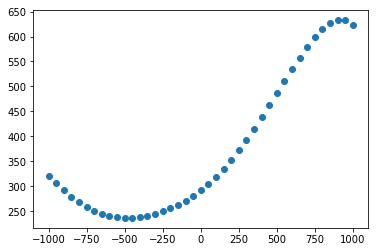

In [24]:
visaulize(z, x_res_robust)

plt.show()

w_0 : -275.74566238, c : 270.799131051, d : 490.431956079, A : 0.412580108151, B : -0.132005585248


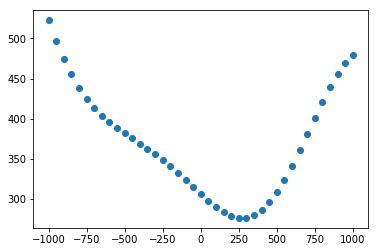

In [25]:
visaulize(z, y_res_robust)

plt.show()